In [ ]:
import geopandas
import rioxarray
import shapely
import pdal
import numpy
import json
import pathlib
import pdal
import time
import matplotlib
import matplotlib.pyplot

# LAS specifies classification values
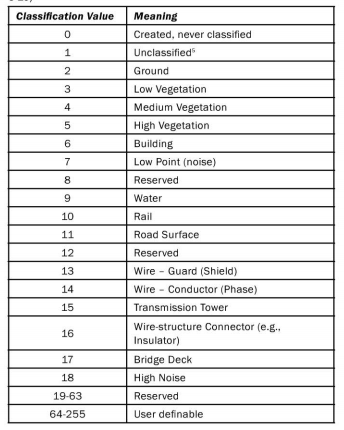
* [Full specification for 1.4](https://www.asprs.org/wp-content/uploads/2010/12/LAS_Specification.pdf)
* The first 8 only are supported for LAS 1.2-1.3 according to [this](https://www.usna.edu/Users/oceano/pguth/md_help/html/las_format_classification_codes.htm) website.

# The NZ20_Westport
Dataset information: https://doi.org/10.5069/G9Z31WV0

Datum information:

    Horizontal: NZTM2000 NZGD2000 Meters [EPSG: 2193]
    Vertical: NZVD2016 [EPSG: 7839]
    
Classification information (screenshot):
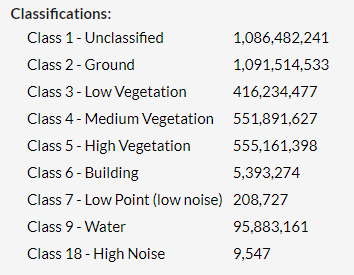

In [ ]:
tile = "CL2_BR20_2020_1000_3612.laz"
file_path = pathlib.Path(r'C:\Users\pearsonra\Documents\data\Westport\local_cache\NZ20_Westport') / tile

In [ ]:
h_crs = 2193
v_crs = 7839

# NZ20_Westport - Load in with horizontal and vertical SRS set

In [ ]:
pdal_pipeline_instructions = [{"type":"readers.las", "filename": str(file_path)},
                              {"type":"filters.reprojection","out_srs":f"EPSG:{h_crs}+{v_crs}"}, 
                              {"type":"filters.info"}]
pdal_pipeline = pdal.Pipeline(json.dumps(pdal_pipeline_instructions))
pdal_pipeline.execute()
metadata_wp=json.loads(pdal_pipeline.get_metadata())
points_wp = pdal_pipeline.arrays

In [ ]:
metadata_wp['metadata'].keys()

In [ ]:
metadata_wp['metadata']['filters.info'].keys()

In [ ]:
metadata_wp['metadata']['filters.reprojection'].keys()

In [ ]:
metadata_wp['metadata']['readers.las'].keys()

In [ ]:
metadata_wp['metadata']['filters.info']['schema']

In [ ]:
metadata_wp['metadata']['filters.info']['dimensions']

In [ ]:
ground = 2
points_wp[0][points_wp[0]['Classification'] == ground]

This tile appears to be ocean or unclassified

# Wellington_2013 - no vertical secified
Vertical given as NZVD2016, but no EPSG code is given for the vertical datum: https://portal.opentopography.org/datasetMetadata?otCollectionID=OT.042017.2193.2

Datum information:

    Horizontal: NZTM2000 NZGD2000 Meters [EPSG: 2193]
    Vertical: NZVD2016 [EPSG: 7839]

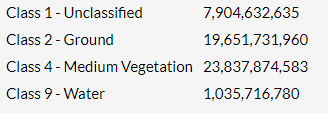

In [ ]:
tile = "ot_CL1_WLG_2013_1km_074035.laz"
file_path = pathlib.Path(r'C:\Users\pearsonra\Documents\data\Wakanae\local_cache\Wellington_2013') / tile

In [ ]:
pdal_pipeline_instructions = [{"type":"readers.las", "filename": str(file_path)},
                              {"type":"filters.reprojection","out_srs":f"EPSG:{h_crs}+{v_crs}"}, 
                              {"type":"filters.info"}]
pdal_pipeline = pdal.Pipeline(json.dumps(pdal_pipeline_instructions))
pdal_pipeline.execute()
metadata_wt=json.loads(pdal_pipeline.get_metadata())
points_wt = pdal_pipeline.arrays

In [ ]:
metadata_wp['metadata'].keys()

In [ ]:
metadata_wp['metadata']['filters.reprojection'].keys()

In [ ]:
metadata_wp['metadata']['readers.las'].keys()

In [ ]:
metadata_wp['metadata']['filters.info'].keys()

In [ ]:
metadata_wp['metadata']['filters.info']['dimensions']

## Get Land in tile

In [ ]:
ground = 2
points_wp[0][points_wp[0]['Classification'] == ground]

**Note no values as this tile is out to sea**